In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [64]:

df = pd.read_csv("FWI Dataset.csv")
print(df)
print(df.info())
print(df.describe())
print(df.head())
print(df.tail())

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
239   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28   87   15    4.4  41.1   6.5     8  0.1   
241   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
242   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes            Region  
0     3.4  0.5  

In [65]:
print("Dataset shape:", df.shape)
print("Original columns:", df.columns)


Dataset shape: (244, 15)
Original columns: Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')


In [66]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [67]:
print("Rows containing missing values:")
print(df[df.isnull().any(axis=1)])

Rows containing missing values:
     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC      DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes            Region  
165  10.4  fire          NaN  Sidi-Bel Abbes  


In [68]:
df.columns = df.columns.str.strip()
print("Column names after stripping spaces:")
print(df.columns)

Column names after stripping spaces:
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [69]:
print("Cleaning string columns")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()


Cleaning string columns


In [70]:
print("Fixing corrupted numeric entries")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace("  ", " ")
    if df[col].dtype == 'object' and df[col].str.contains(" ").any():
        df[col] = df[col].str.split(" ").str[0]

Fixing corrupted numeric entries


In [71]:
numeric_cols = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [72]:
print("Filling missing values with mode")
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])


Filling missing values with mode


In [73]:
print("Encoding categorical columns")
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])

Encoding categorical columns


In [74]:
le_class = LabelEncoder()
df['Classes_encoded'] = le_class.fit_transform(df['Classes'])

In [75]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
day                0
month              0
year               0
Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI                1
Classes            0
Region             0
Region_encoded     0
Classes_encoded    0
dtype: int64


In [76]:
print("Final dataset shape:")
print(df.shape)

Final dataset shape:
(244, 17)


Label encoding non-numeric columns
Selecting all numeric columns (including encoded)
Plotting correlation heatmap for all numeric features


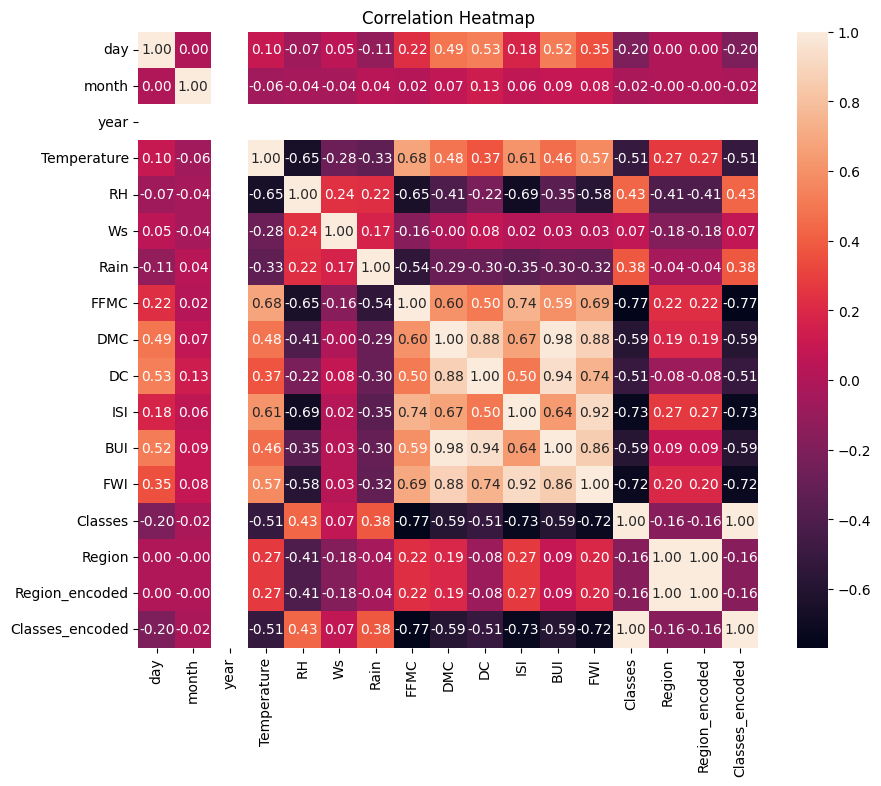

In [77]:
print("Label encoding non-numeric columns")
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

print("Selecting all numeric columns (including encoded)")
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

print("Plotting correlation heatmap for all numeric features")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [78]:
print("Head and shape of final cleaned dataset:")
print(df.head())
print(df.shape)

Head and shape of final cleaned dataset:
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI Classes  Region  Region_encoded  Classes_encoded  
0  0.5     not  Bejaia               0                2  
1  0.4     not  Bejaia               0                2  
2  0.1     not  Bejaia               0                2  
3  0.0     not  Bejaia               0                2  
4  0.5     not  Bejaia               0                2  
(244, 17)


In [79]:
df.to_csv("FWI Cleaned.csv", index=False)
print("Saved cleaned_fwi.csv")

Saved cleaned_fwi.csv
